## Mosquitos and beer consumption

In [20]:
#loading the dataset
import pandas as pd
data = pd.read_csv('mosquitos_data.csv')
print(data.head())

   Response Treatment
0        27      Beer
1        20      Beer
2        21      Beer
3        26      Beer
4        27      Beer


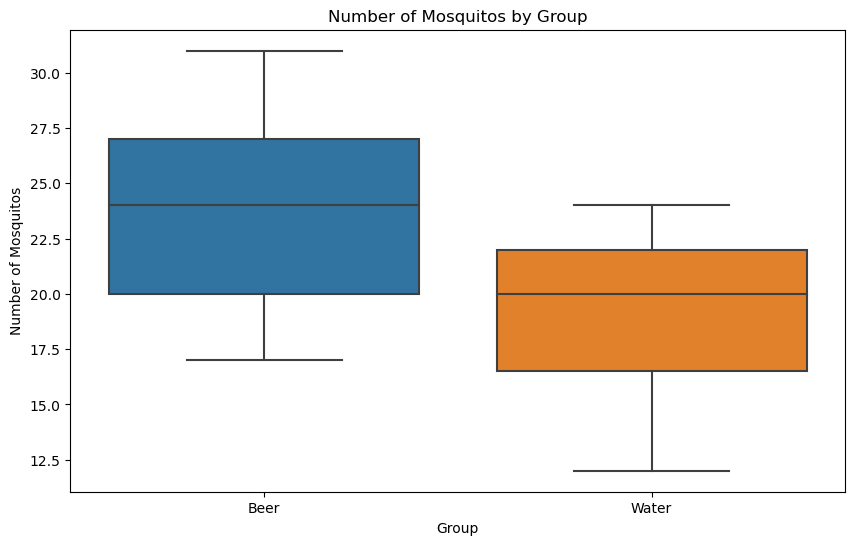

In [21]:
#1.1 Creating side-by-side boxplots
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Treatment', y='Response', data=data)
plt.title('Number of Mosquitos by Group')
plt.xlabel('Group')
plt.ylabel('Number of Mosquitos')
plt.show()

In [ ]:
#1.2 The boxplots show some differences, most importantly the median line of a Beer box plot lies outside the box of the water box plot, then we can say that there is likely to be a difference between the two groups.

In [29]:
# 1.3 Calculating basic statistics for each droup

beer_data = data[data['Treatment'] == 'Beer']['Response']
water_data = data[data['Treatment'] == 'Water']['Response']

beer_mean = beer_data.mean()
beer_median = beer_data.median()
beer_std = beer_data.std()

water_mean = water_data.mean()
water_median = water_data.median()
water_std = water_data.std()

beer_stats = {
    'Mean': beer_mean,
    'Median': beer_median,
    'Standard Deviation': beer_std
}

water_stats = {
    'Mean': water_mean,
    'Median': water_median,
    'Standard Deviation': water_std
}

print(beer_stats, water_stats)

{'Mean': 23.6, 'Median': 24.0, 'Standard Deviation': 4.133198922545748} {'Mean': 19.22222222222222, 'Median': 20.0, 'Standard Deviation': 3.6711202899124045}


In [ ]:
#1.4 We can see the Bear group got higher mean and median vallues which can indicate that on average more mosquitoes were attracted to individuals who consumed beer compared to those who drank water. The larger standard for the bear group suggests greater variability in the number of mosquitoes attracted within that group.

In [32]:
#2 Simulating data assuming that there is no association between beer consumption and mosquito attraction
import numpy as np

# Observed difference in means
observed_diff = beer_mean - water_mean

# Combine data and shuffle
combined_data = data['Response'].values
n_beer = len(beer_data)

# Number of simulations
n_simulations = 10000
diffs = []

for _ in range(n_simulations):
    np.random.shuffle(combined_data)
    new_beer_mean = np.mean(combined_data[:n_beer])
    new_water_mean = np.mean(combined_data[n_beer:])
    diffs.append(new_beer_mean - new_water_mean)

# Calculate p-value
diffs = np.array(diffs)
p_value = np.sum(diffs >= observed_diff) / n_simulations

observed_diff, p_value

(4.37777777777778, 0.0002)

In [ ]:
#2.1 we can see the p-value is 0.002, bacause its under 0.05 so we can say its statistically significant and we reject the null hypothesis which is assuming that there is no association between beer consumption and mosquito attraction.